In [1]:
import pandas as pd
pd.set_option("display.max_colwidth", None)
pd.set_option("display.max_rows", None)
import pickle
import csv
from time import time
import os
import re
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import colorcet as cc
import warnings
warnings.filterwarnings("ignore")
plt.set_loglevel('WARNING')
from matplotlib.lines import Line2D

In [2]:
sns.set_style("darkgrid")
sns.set_context("paper")
colors = sns.color_palette(cc.glasbey_dark, n_colors = 12)

In [8]:
#creating dictionary of major events during the observation period

In [9]:
events = {"2020-03-22" : "Janata Curfew", "2020-03-25" : "National lockdown", \
          "2020-03-31" : "Tablighi Jamaat declared super spreader event"}

In [10]:
#creating x-axis ticks for the plots

In [11]:
start_date = pd.to_datetime("2020-01-22", format = "%Y-%m-%d")
week_starts = [start_date + pd.Timedelta(i, "W") for i in range(19)]
starts = [str(week.date()) for week in week_starts]
starts

['2020-01-22',
 '2020-01-29',
 '2020-02-05',
 '2020-02-12',
 '2020-02-19',
 '2020-02-26',
 '2020-03-04',
 '2020-03-11',
 '2020-03-18',
 '2020-03-25',
 '2020-04-01',
 '2020-04-08',
 '2020-04-15',
 '2020-04-22',
 '2020-04-29',
 '2020-05-06',
 '2020-05-13',
 '2020-05-20',
 '2020-05-27']

In [5]:
#loading the data

In [3]:
tweets = pickle.load(open("national tweet_details.pkl", "rb"))

In [6]:
tweets.head()

,date,total tweets,total negative tweets,muslim tweets,muslim negative tweets,muslim tablighi tweets,muslim tablighi negative tweets,muslim corona tweets,muslim corona negative tweets,state,datetime,day
0,2020-01-22,802,46,5,1,0,0,0,0,Andhra_Pradesh,2020-01-22,Wednesday
1,2020-01-23,880,41,16,9,0,0,0,0,Andhra_Pradesh,2020-01-23,Thursday
2,2020-01-24,874,38,7,4,0,0,0,0,Andhra_Pradesh,2020-01-24,Friday
3,2020-01-25,812,43,7,1,0,0,0,0,Andhra_Pradesh,2020-01-25,Saturday
4,2020-01-26,936,50,16,8,0,0,0,0,Andhra_Pradesh,2020-01-26,Sunday


In [5]:
for stat in ["total tweets", "muslim tweets", "muslim negative tweets"]:
    print("{} : {} tweets".format(stat, tweets[stat].sum()))

total tweets : 4246514 tweets
muslim tweets : 96022 tweets
muslim negative tweets : 32157 tweets


In [7]:
#creating plot for total tweets made every day

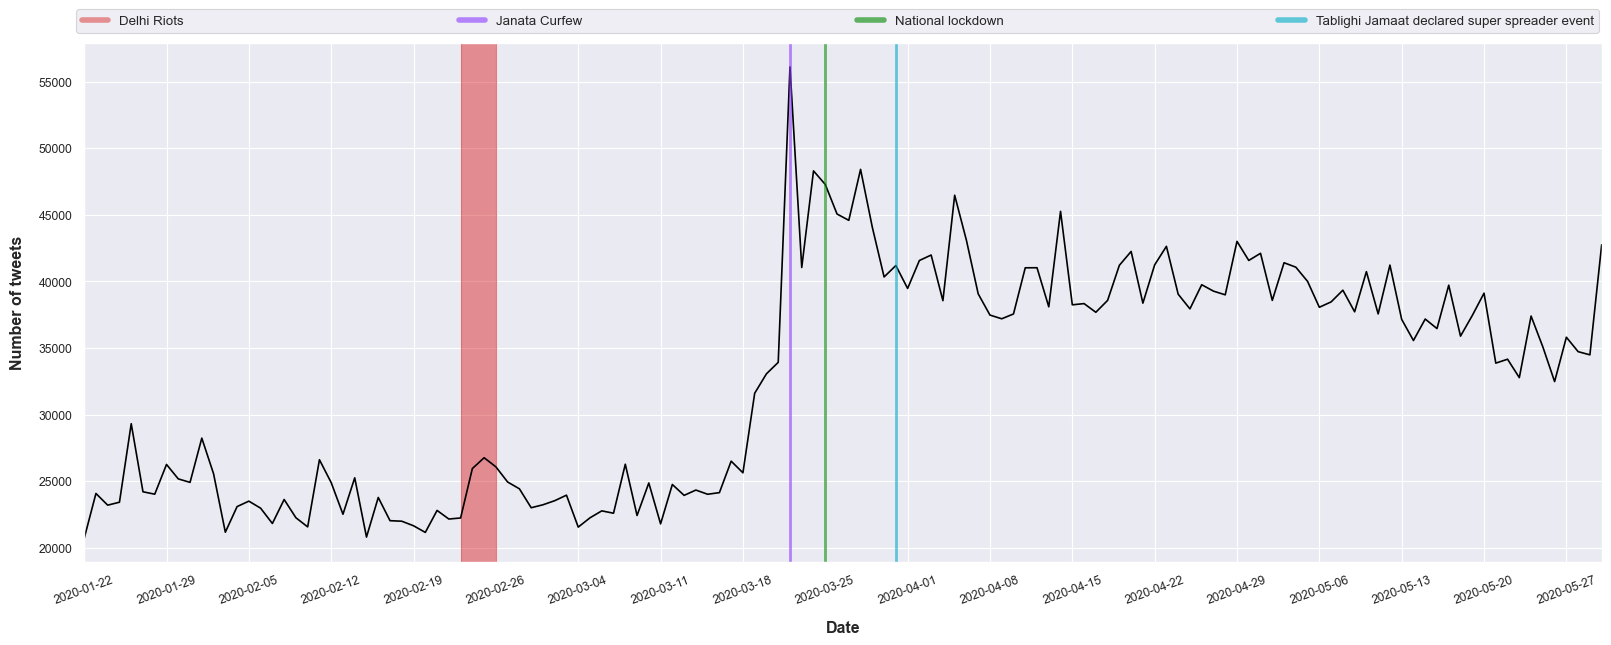

In [17]:
fig, ax = plt.subplots(figsize = (16, 6), layout = "constrained")
ax.plot(tweets.groupby("date").sum()["total tweets"], linestyle = "-", color = "black")
ax.set_xticks(ticks = starts, labels = starts, rotation = 20)
ax.set_ylabel("Number of tweets", labelpad = 10, fontsize = "large", fontweight = "bold")
ax.set_xlabel("Date", labelpad = 10, fontsize = "large", fontweight = "bold")
ax.axvspan(xmin = "2020-02-23", xmax = "2020-02-26", alpha = 0.4, color = colors[0], linestyle = "solid", \
              animated = True)
for i, tup in enumerate(events.items()):
    ax.axvline(x = tup[0], color = colors[1:][i], linestyle = "-", alpha = 0.6, label = tup[1], \
                  animated = True, linewidth = 2.0)
legend_lines = [Line2D([0], [0], color = colors[0], lw = 4, alpha = 0.4)]
legend_labels = ["Delhi Riots"]
for i, tup in enumerate(events.items()):
    legend_lines.append(Line2D([0], [0], color = colors[1:][i], lw = 4, alpha = 0.6))
    legend_labels.append(tup[1])
fig.legend(legend_lines, legend_labels, loc = "lower left", bbox_to_anchor = (0.04, 1, 0.96, .02), mode = "expand", \
           ncol = 4, fontsize = "medium", frameon = True, fancybox = True)
ax.margins(x = 0);

In [14]:
#saving plot

In [18]:
fig.savefig("total tweets.png", bbox_inches = "tight")

In [15]:
#creating bar plots tp show distribution of total tweets across (a) day of the week and (b) top 5 states

In [16]:
dist_day = tweets.groupby("day").sum()["total tweets"].sort_values(ascending = False)

Text(0.5, 0, 'Number of tweets')

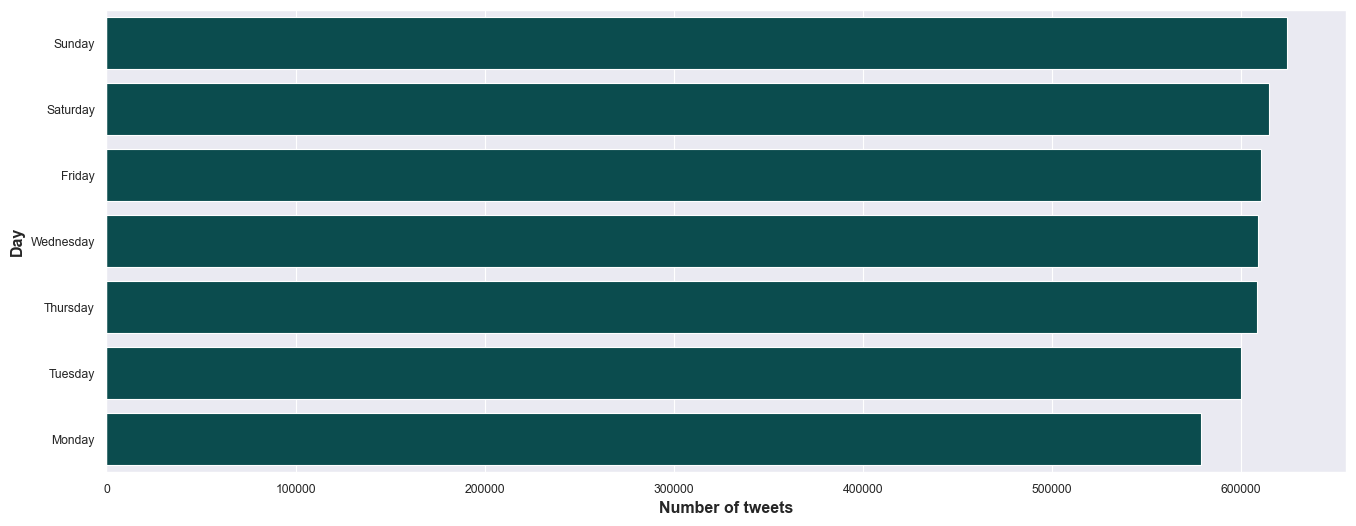

In [20]:
fig, ax = plt.subplots(figsize = (16, 6))
sns.barplot(x = dist_day, y = dist_day.index, ax = ax, color = colors[-4])
ax.set_ylabel("Day", fontsize = "large", fontweight = "bold")
ax.set_xlabel("Number of tweets", fontsize = "large", fontweight = "bold")

In [21]:
fig.savefig("total tweets distribution per day of week.png", bbox_inches = "tight")

In [22]:
dist_state = tweets.groupby("state").sum()["total tweets"].sort_values(ascending = False)[:5]

Text(0.5, 0, 'Number of tweets')

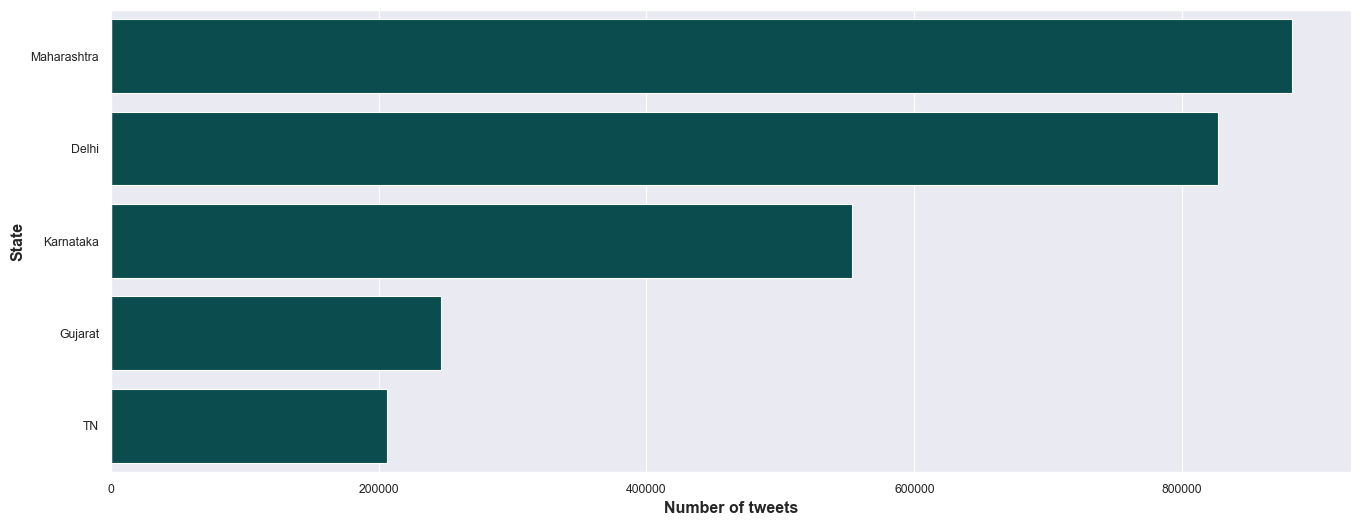

In [24]:
fig, ax = plt.subplots(figsize = (16, 6))
sns.barplot(x = dist_state, y = dist_state.index, ax = ax, color = colors[-4])
ax.set_ylabel("State", fontsize = "large", fontweight = "bold")
ax.set_xlabel("Number of tweets", fontsize = "large", fontweight = "bold")

In [25]:
fig.savefig("total tweets distribution per state.png", bbox_inches = "tight")

In [26]:
#creating plot for negative muslim tweets over observation period

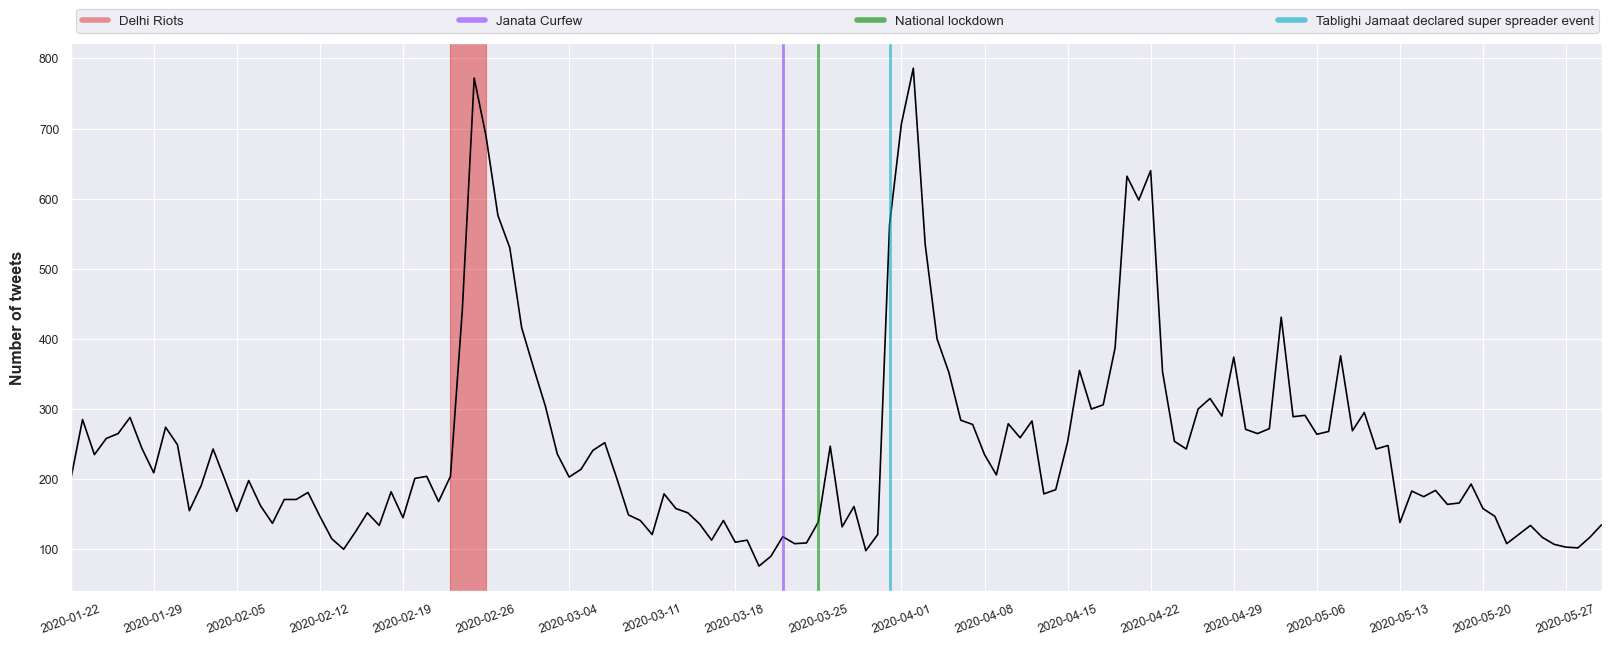

In [28]:
fig, ax = plt.subplots(figsize = (16, 6), layout = "constrained")
ax.plot(tweets.groupby("date").sum()["muslim negative tweets"], linestyle = "-", color = "black")
ax.set_xticks(ticks = starts, labels = starts, rotation = 20)
ax.set_ylabel("Number of tweets", labelpad = 10, fontsize = "large", fontweight = "bold")
ax.axvspan(xmin = "2020-02-23", xmax = "2020-02-26", alpha = 0.4, color = colors[0], linestyle = "solid", \
              animated = True)
for i, tup in enumerate(events.items()):
    ax.axvline(x = tup[0], color = colors[1:][i], linestyle = "-", alpha = 0.6, label = tup[1], \
                  animated = True, linewidth = 2.0)
legend_lines = [Line2D([0], [0], color = colors[0], lw = 4, alpha = 0.4)]
legend_labels = ["Delhi Riots"]
for i, tup in enumerate(events.items()):
    legend_lines.append(Line2D([0], [0], color = colors[1:][i], lw = 4, alpha = 0.6))
    legend_labels.append(tup[1])
fig.legend(legend_lines, legend_labels, loc = "lower left", bbox_to_anchor = (0.04, 1, 0.96, .02), mode = "expand", \
           ncol = 4, fontsize = "medium", frameon = True, fancybox = True)
ax.margins(x = 0);

In [29]:
fig.savefig("muslim tweets.png", bbox_inches = "tight")

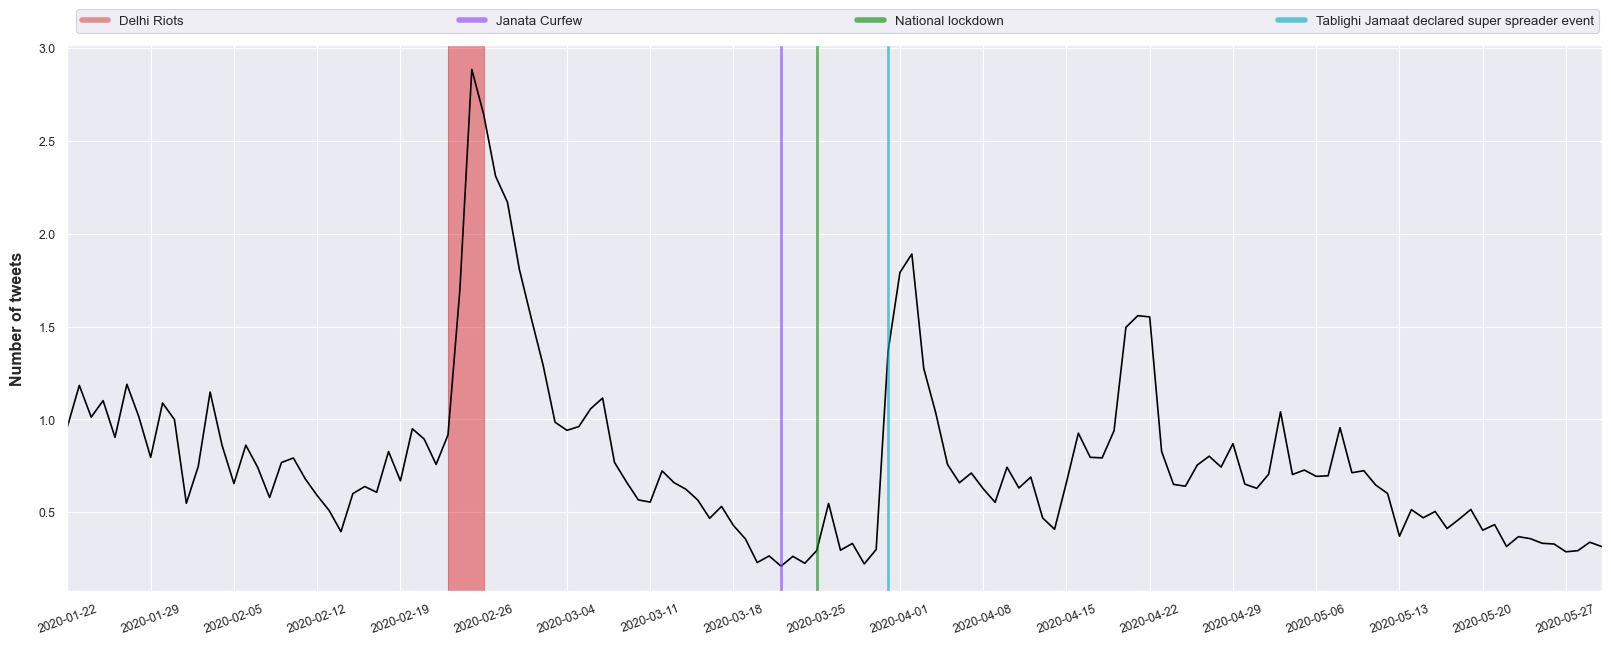

In [31]:
fig, ax = plt.subplots(figsize = (16, 6), layout = "constrained")
ax.plot((tweets.groupby("date").sum()["muslim negative tweets"]/tweets.groupby("date").sum()["total tweets"])*100, \
         linestyle = "-", color = "black")
ax.set_xticks(ticks = starts, labels = starts, rotation = 20)
ax.set_ylabel("Number of tweets", labelpad = 10, fontsize = "large", fontweight = "bold")
ax.axvspan(xmin = "2020-02-23", xmax = "2020-02-26", alpha = 0.4, color = colors[0], linestyle = "solid", \
              animated = True)
for i, tup in enumerate(events.items()):
    ax.axvline(x = tup[0], color = colors[1:][i], linestyle = "-", alpha = 0.6, label = tup[1], \
                  animated = True, linewidth = 2.0)
legend_lines = [Line2D([0], [0], color = colors[0], lw = 4, alpha = 0.4)]
legend_labels = ["Delhi Riots"]
for i, tup in enumerate(events.items()):
    legend_lines.append(Line2D([0], [0], color = colors[1:][i], lw = 4, alpha = 0.6))
    legend_labels.append(tup[1])
fig.legend(legend_lines, legend_labels, loc = "lower left", bbox_to_anchor = (0.04, 1, 0.96, .02), mode = "expand", \
           ncol = 4, fontsize = "medium", frameon = True, fancybox = True)
ax.margins(x = 0);

In [32]:
fig.savefig("negative muslim tweets.png", bbox_inches = "tight")

In [33]:
##creating bar plots tp show distribution of negative muslim tweets across (a) day of the week and 
#(b) top 5 states

In [34]:
dist_day = tweets.groupby("day").sum()["muslim negative tweets"].sort_values(ascending = False)

Text(0.5, 0, 'Number of tweets')

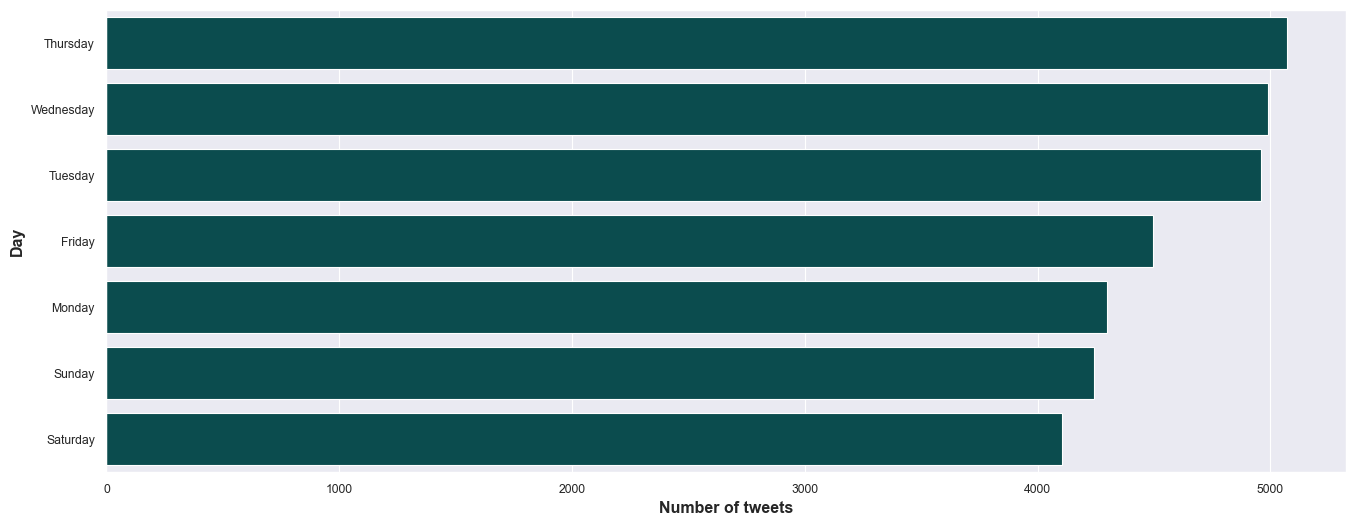

In [35]:
fig, ax = plt.subplots(figsize = (16, 6))
sns.barplot(x = dist_day, y = dist_day.index, ax = ax, color = colors[-4])
ax.set_ylabel("Day", fontsize = "large", fontweight = "bold")
ax.set_xlabel("Number of tweets", fontsize = "large", fontweight = "bold")

In [36]:
fig.savefig("negative muslim tweets distribution per day.png", bbox_inches = "tight")

In [38]:
dist_state = tweets.groupby("state").sum()["muslim negative tweets"].sort_values(ascending = False)[:5]

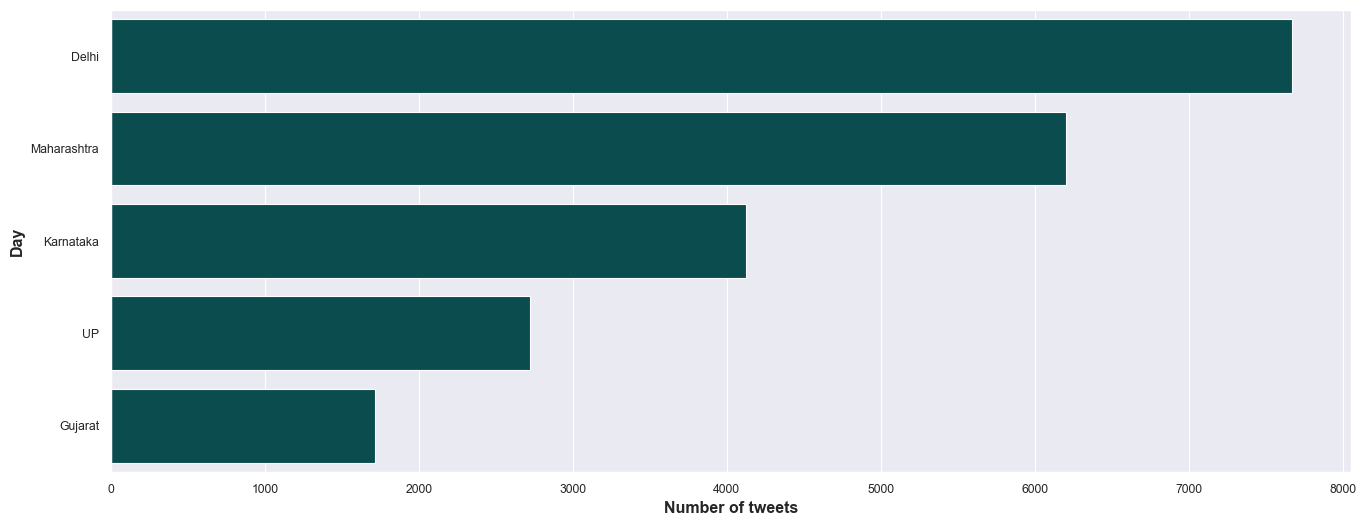

In [40]:
fig, ax = plt.subplots(figsize = (16, 6))
sns.barplot(x = dist_state, y = dist_state.index, ax = ax, color = colors[-4])
ax.set_ylabel("Day", fontsize = "large", fontweight = "bold")
ax.set_xlabel("Number of tweets", fontsize = "large", fontweight = "bold");

In [41]:
fig.savefig("negative muslim tweets distribution per state.png", bbox_inches = "tight")